✅ Total faces detected: 17


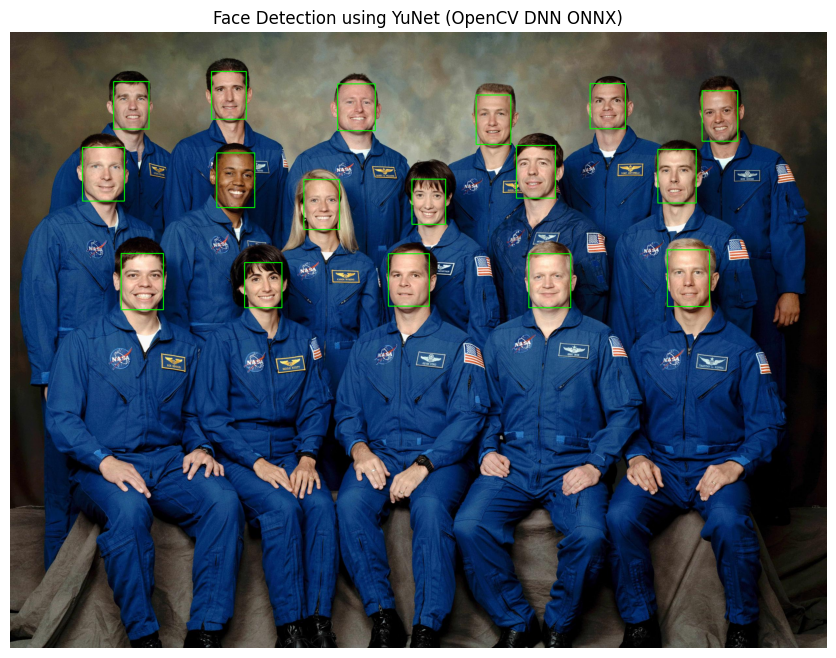

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/CV Images/FaceDetect.jpg'  # Update if needed
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Could not load image.")

# Load YuNet model
detector = cv2.FaceDetectorYN.create(
    model="/content/face_detector.onnx", # Updated path
    config="",
    input_size=(img.shape[1], img.shape[0]),
    score_threshold=0.6,
    nms_threshold=0.3,
    top_k=5000
)

# Detect faces
detector.setInputSize((img.shape[1], img.shape[0]))
_, faces = detector.detect(img)

# Draw detections
face_count = 0
if faces is not None:
    for face in faces:
        x, y, w, h, score = face[:5].astype(int)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        face_count += 1

print(f"✅ Total faces detected: {face_count}")

# Show result
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Face Detection using YuNet (OpenCV DNN ONNX)")
plt.show()